# K-means solution to Data Demands Business Case
The first approach to the problem was erroneous. Selecting one location to then split into two to find the minima only resulted in optimizing for that one location, failing to find the real minima of two locations. My error was following logical intuition without robust mathematical proof and not considering existing altenative methods. 

In spirit of improving and learning i'll solve the aforementioned problem by exploring different aproaches.

## **Approach**
1. **Defining the objective function**
Given:
* A set of coordinates $ C = \{c_1, c_2, ..., c_n/} $
* Each coordinate $c_i$ has a weight $w_i$
* Two unknown points $P_1$ and $P_2$
* Distance function $d(a,b)$ (geodesic distance)

The goal is to find $P_1$ and $P_2$ that minimize:
$$ /sum_{i = 1}^{m} w_i * d(c_i,P_j)  $$
where each coordinate $c_i$ is assigned to the closest of $P_1$ or $P_2$.

2. **Assign Each Coordinate to One of the Two Points**

For each coordinate $c_i$, assign it to the closest point based on the weighted distance:

Assign $c_i$ to $P_j$ where $j = /argmin_{k}w_i * d(c_i, P_k)$

### **Possible Approaches**
1. **K-means with Weighted Centroids**
    * Initialize $P_1$ and $P_2$ randomly.
    * Assign each coordinate to the nearest point.
    * Update $P_1$ and $P_2$ using the weighted centroid:

$$ P_j = \frac{\sum_{c_i \epsilon S_j} w_i c_i}{\sum_{c_i \epsilon S_j} w_i} $$
* 
    * iterate until convergence

2. **Gradient-Based Optimization**
    * Define a loss function as the sum of the weighted distances.
    * Use an optimizer (e.g., gradient descent, genetic algorithms) to minimize it.

3. **Integer Linear Programming (ILP)**
    * Define binary variables for assigning each coordinate to $P_1$ or $P_2$
    * Minimize total wighted distance under assignment constraints.

4. **Genetic Algorithm (GA) / Simulated Annealing**
    * Randomly generate candidate solutions.
    * Evolve towards the best configuration while ensuring constraints.



In [ ]:
#Original K-Means solution
def k_means_cluster(k, points):
    # Initialization: choose k centroids (Forgy, Random Partition, etc.)
    centroids = [c1, c2, ..., ck]
    
    # Initialize clusters list
    clusters = [[] for _ in range(k)]
    
    # Loop until convergence
    converged = false
    while not converged:
        # Clear previous centroids
        centroids = [[] for _ in range(k)]
    
        # Assign each point to the "closest" centroid 
        for point in points:
            distances_to_each_centroid = [distance(point, centroid) for centroid in centroids]
            cluster_assignment = argmin(distances_to_each_centroid)
            clusters[cluster_assignment].append(point)
        
        # Calculate new centroids
        #   (the standard implementation uses the mean of all points in a
        #     cluster to determine the new centroid)
        new_centroids = [calculate_centroid(cluster) for cluster in clusters]
        
        converged = (new_centroids == centroids)
        centroids = new_centroids
        
        if converged:
            return clusters

In [2]:
#Importing modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from geopy import distance

In [3]:
# Customer data import
path = "Uber Freight Engineering - Customer Demands Business Case.xlsx"
df = pd.read_excel(path)

In [ ]:
#PseudoCode
"""
# Modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from geopy import distance
"""

"""
All coors are in (lattiude, longitude) order

def k_means_cluster(k:int, points:(float, float)) -> clusters:list[(float, float),...], centroids:list[(float,float),...]
def initialization_method(k:int, method:string) -> centroids:list[(float, float),...]
def geodesic_distance(point:(float,float), centroid:(float, float)) -> distance:float
def calculate_centroid(points:list[(float,float),...]) -> new_centroid:(float,float)
"""

"""
def initialization_method(k:int, method:string, points:) -> centroids:list[(float, float),...]
    # Setting range
    x_range = (min([n[1] for n in points]), max([n[1] for n in points]))
    y_range = (min([n[0] for n in points]), max([n[0] for n in points]))
    
    #Init clusters
    centroids = []
    
    if method == "Random":
        for _ in range(k):
            lat = random.randrange(y_range[0], y_range[1], 1)
            lon = random.randrange(x_range[0], x_range[1], 1)
            centroids.append((lat,lon))

    #TODO: Implement forgy

    return centroids

def weight(point:(float,float), weight:int, centroid:(float, float)) -> cust_weight:float
    # For geodesic distances and counting the number of shipments
    return (weight * distance.distance(point, centroid).miles)

    
def calculate_centroid(points:list[(float,float)]) -> new_centroid:(float,float)
    # Mean of all points approach
    mean_lat = sum([coors[0] for coors in points])/len(points)
    mean_lon = sum([coors[1] for coors in points])/len(points)

    return (mean_lat, mean_lon)

def k_means_cluster(k:int, points:list[(float, float), weights:list[int]) -> clusters:list[(float, float)], centroids:list[(float,float)]
    # Initialization: choose k centroids by method
    method = ["Random", "Forgy"]
    centroids = initialization_method(k, method[0], points)

    # Initialize cluster list
    clusters = [[] for _ in range(k)]

    # Loop until convergence
    converged = False
    while not converged:
        # Clear previous clusters
        clusters = [[] for _ in range(k)]

        # Assign each point to the "closest" centroid
        for i, point in enumerate(points):
            weights_to_each_centroid = [weight(point, weights[i], centroid) for centroid in centroids]
            cluster_assigment = np.argmin(weights_to_each_centroid) # Selects the lightest centroid 
            clusters[cluster_assignment].append(point)

        # Calculate new centroids
        #   (the standard implementation uses the mean of all points in a cluster to determine the new centroid)
        new_centroids = [calculate_centroid(cluster) for cluster in clusters]

        converged = (new_centroids = centroids)
        centroids = new_centroids

        if converged:
            return clusters, centroids
"""

'\ndef initialization_method(k:int, method:string, points:) -> centroids:list[(float, float),...]\n    # Setting range\n    x_range = (min([n[1] for n in points]), max([n[1] for n in points]))\n    y_range = (min([n[0] for n in points]), max([n[0] for n in points]))\n    \n    #Init clusters\n    centroids = []\n    \n    if method == "Random":\n        for _ in range(k):\n            lat = random.randrange(y_range[0], y_range[1], 1)\n            lon = random.randrange(x_range[0], x_range[1], 1)\n            centroids.append((lat,lon))\n\n    #TODO: Implement forgy\n\n    return centroids\n\ndef weight(point:(float,float), weight:int, centroid:(float, float)) -> cust_weight:float\n    # For geodesic distances and counting the number of shipments\n    return (weight * distance.distance(point, centroid).miles)\n\n    \ndef calculate_centroid(points:list[(float,float)]) -> new_centroid:(float,float)\n    # Mean of all points approach\n    mean_lat = sum([coors[0] for coors in points])/len

In [ ]:
# All coors are in (lattiude, longitude) order

def initialization_method(k:int, method:str, points:tuple[float,float]) -> list[tuple[float, float]]:
    # Setting range
    x_range = (min([n[1] for n in points]), max([n[1] for n in points]))
    y_range = (min([n[0] for n in points]), max([n[0] for n in points]))
    
    #Init clusters
    centroids = []
    
    if method == "Random":
        for _ in range(k):
            lat = random.uniform(y_range[0], y_range[1])
            lon = random.uniform(x_range[0], x_range[1])
            centroids.append((lat,lon))

    #TODO: Implement forgy

    return centroids

def weight(point:tuple[float,float], weight:int, centroid:tuple[float, float]) -> float:
    # For geodesic distances and counting the number of shipments
    return (weight * distance.distance(point, centroid).miles)

    
def calculate_centroid(points:list[tuple[float,float]]) -> tuple[float,float]:
    # Mean of all points approach
    mean_lat = sum([coors[0] for coors in points])/len(points)
    mean_lon = sum([coors[1] for coors in points])/len(points)

    return (mean_lat, mean_lon)

def k_means_cluster(k:int, points:list[tuple[float, float]], weights:list[int]) -> tuple[list[tuple[float, float]], list[tuple[float,float]]]:
    # Initialization: choose k centroids by method
    method = ["Random", "Forgy"]
    centroids = initialization_method(k, method[0], points)

    # Initialize cluster list
    clusters = [[] for _ in range(k)]

    # Loop until convergence
    converged = False
    while not converged:
        # Clear previous clusters
        clusters = [[] for _ in range(k)]

        # Assign each point to the "closest" centroid
        for i, point in enumerate(points):
            weights_to_each_centroid = [weight(point, weights[i], centroid) for centroid in centroids]
            cluster_assignment = np.argmin(weights_to_each_centroid) # Selects the lightest centroid 
            clusters[cluster_assignment].append(point)

        #TODO: Add animated graph here

        # Calculate new centroids
        #   (the standard implementation uses the mean of all points in a cluster to determine the new centroid)
        new_centroids = [calculate_centroid(cluster) for cluster in clusters]

        converged = (new_centroids == centroids)
        centroids = new_centroids

        if converged:
            return clusters, centroids

In [6]:
# Entry Values
k = 2
points =  (df[["Latitude", "Longitude"]].values.tolist())
weights = df.SHIPMENTS.values.tolist()

clusters, centroids = k_means_cluster(k, points, weights)

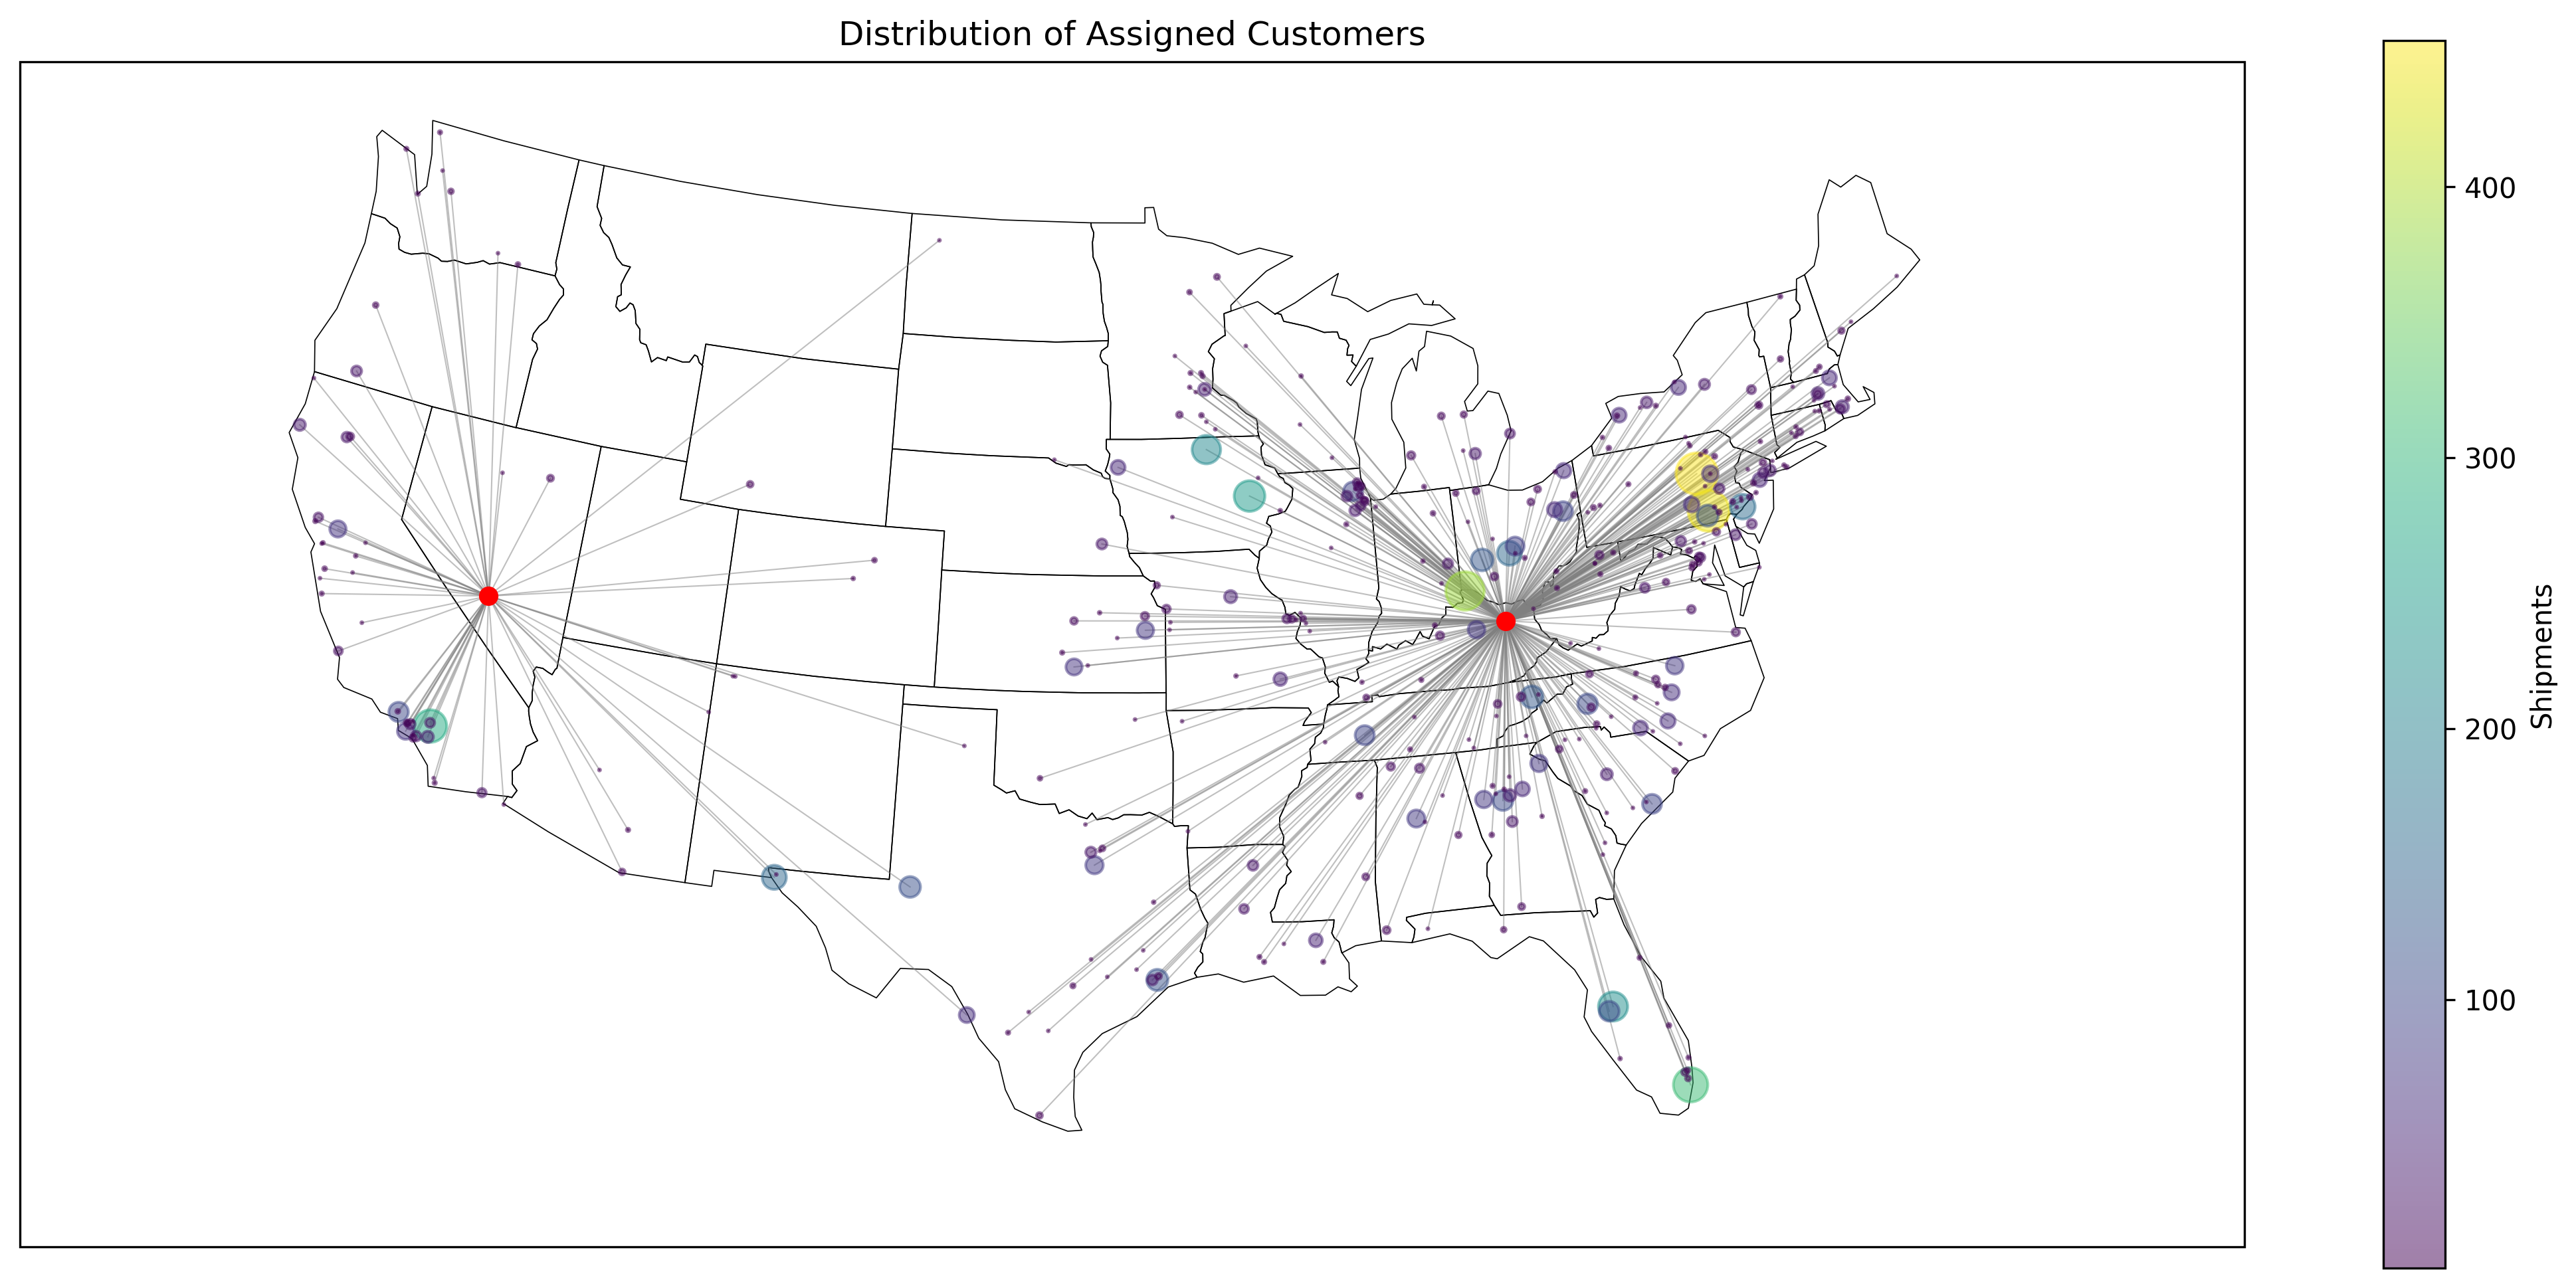

In [7]:
from utils.usMap import usMap
import cartopy.crs as ccrs

fig, ax = usMap()

# Customer Scatter map
scatter = ax.scatter(
    x=df['Longitude'],
    y=df['Latitude'],
    c=df['SHIPMENTS'],  # Color by shipments
    s=df['SHIPMENTS'] * 0.5,  # Scale marker size
    cmap='viridis',  # Colormap
    alpha=0.5,  # Transparency
    transform=ccrs.PlateCarree(),  # Declare geographic coordinates
    zorder=3  # Top layer
)

# Add colorbar
plt.colorbar(scatter, ax=ax, label='Shipments')

# Plot lines connecting customers to their assigned warehouse
for i, cluster in enumerate(clusters):
    ax.plot(centroids[i][1], centroids[i][0],"ro", transform=ccrs.PlateCarree(), zorder=3)
    for j, customer in enumerate(cluster):
        ax.plot(
            [customer[1], centroids[i][1]],  # X-coordinates: customer → warehouse
            [customer[0], centroids[i][0]],  # Y-coordinates: customer → warehouse
            color='gray', linewidth=0.5, alpha=0.5, transform=ccrs.PlateCarree(), zorder=2
        )
        

# Fig size
fig.set_size_inches(18,8)
fig.set_dpi(300)

# Title and show
plt.title('Distribution of Assigned Customers')
plt.show()

## Generator for animations

In [9]:
# Turning function into a generator
def k_means_cluster_generator(k:int, points:list[tuple[float, float]], weights:list[int]) -> tuple[list[tuple[float, float]], list[tuple[float,float]]]:
    # Initialization: choose k centroids by method
    method = ["Random", "Forgy"]
    centroids = initialization_method(k, method[0], points)

    # Initialize cluster list
    clusters = [[] for _ in range(k)]

    # Loop until convergence
    converged = False
    while not converged:
        # Clear previous clusters
        clusters = [[] for _ in range(k)]

        # Assign each point to the "closest" centroid
        for i, point in enumerate(points):
            weights_to_each_centroid = [weight(point, weights[i], centroid) for centroid in centroids]
            cluster_assignment = np.argmin(weights_to_each_centroid) # Selects the lightest centroid 
            clusters[cluster_assignment].append(point)

        yield clusters, centroids

        # Calculate new centroids
        #   (the standard implementation uses the mean of all points in a cluster to determine the new centroid)
        new_centroids = [calculate_centroid(cluster) for cluster in clusters]

        converged = (new_centroids == centroids)
        centroids = new_centroids